In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score, silhouette_score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score ,v_measure_score
from sklearn.model_selection import train_test_split

#from data import *
from helpers import *


In [2]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns,label_gated=3,label_not_gated=1)

In [3]:
file = '../labeled_dataset/GL53_UP_1A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']

X,y = preprocess(file,columns)

../labeled_dataset/GL53_UP_1A.csv


../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.8732844251470732

...ready!
0 samples done...
Rand Index: 0.541
Adjusted Rand Index: 0.088
Homogeneity: 0.476
Completeness: 0.132
V-measure: 0.206
Adjusted Mutual Information: 0.203
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.9454677503384659

...ready!
0 samples done...
10000 samples done...
Rand Index: 0.513
Adjusted Rand Index: 0.094
Homogeneity: 0.597
Completeness: 0.158
V-measure: 0.250
Adjusted Mutual Information: 0.249
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.8703843648151818

...read

/home/mika/.local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


../labeled_dataset/GL58_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_3A.csv
(7971, 5)
Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.9594708259559503

...ready!
0 samples done...
Rand Index: 0.531
Adjusted Rand Index: 0.139
Homogeneity: 0.574
Completeness: 0.172
V-measure: 0.264
Adjusted Mutual Information: 0.263
../labeled_dataset/GL58_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_1A.csv
(10296, 5)
Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.8344386764059769

...ready!
0 samples done...
10000 samples done...
Rand Index: 0.516
Adjusted Rand Index: 0.056
Homogeneity: 0.216
Completeness: 0.072
V-measure: 0.108
Adjusted Mutual Information: 0.108
../labeled_dataset/GL59_DN_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_1A.csv
(11994, 5)
Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.0611694595127363

...rea

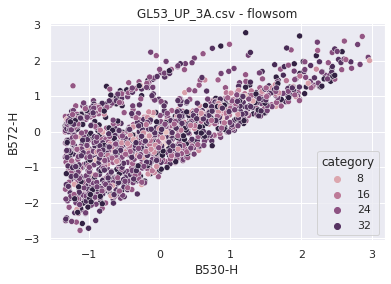

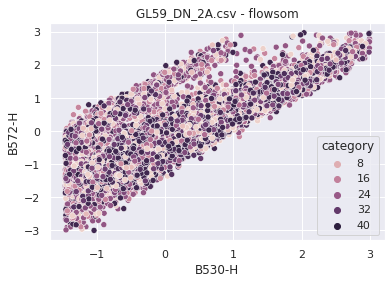

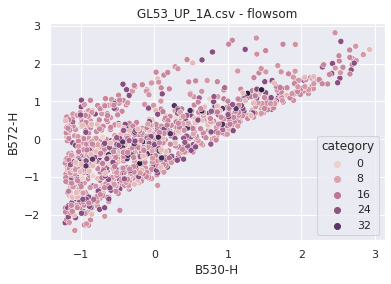

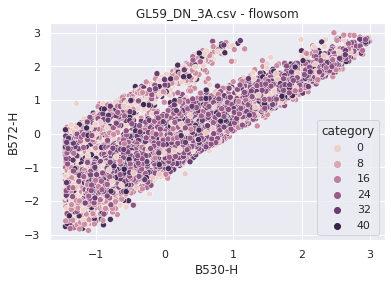

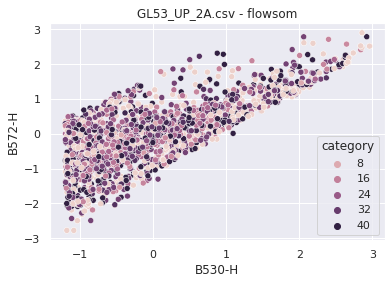

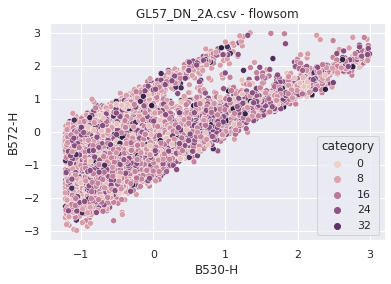

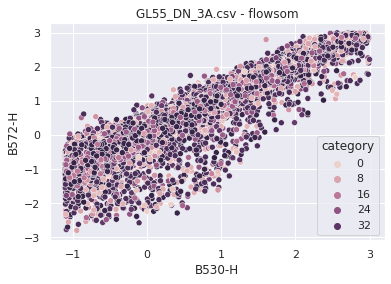

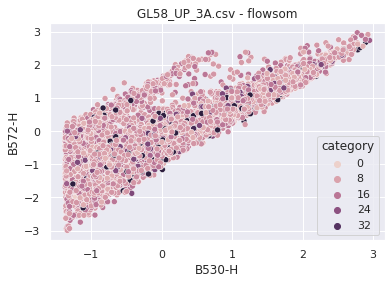

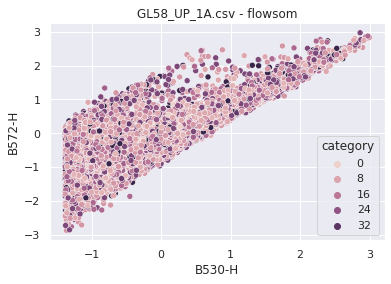

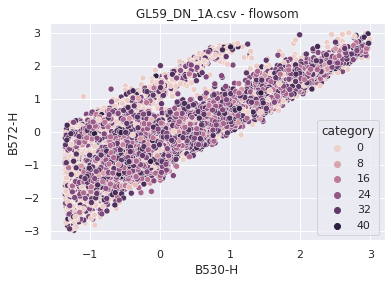

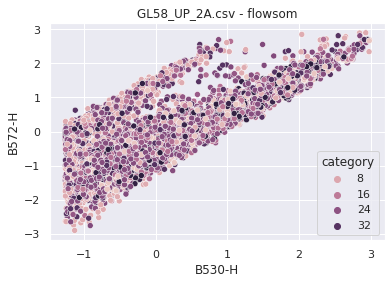

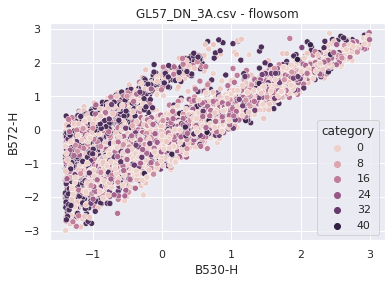

In [4]:
run_all(columns,clustering="flowsom")

In [4]:
X.shape

(1359, 5)

In [5]:
X.to_csv('../labeled_dataset/flowSOM_GL53_UP_1A.csv')

In [6]:
from flowsom import *
from sklearn.cluster import AgglomerativeClustering

file = '../labeled_dataset/flowSOM_GL53_UP_1A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']
fsom = flowsom(file, if_fcs=False, if_drop=True, drop_col=['Unnamed: 0'])
fsom.som_mapping(50, 50, 5, sigma=2.5, 
                 lr=0.1, batch_size=100)  # trains SOM with 100 iterations
fsom.meta_clustering(AgglomerativeClustering, min_n=40, 
                     max_n=45, 
                     iter_n=3) # train the meta clustering for cluster in range(40,45)    

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.8728088167950417

...ready!


40
0 samples done...


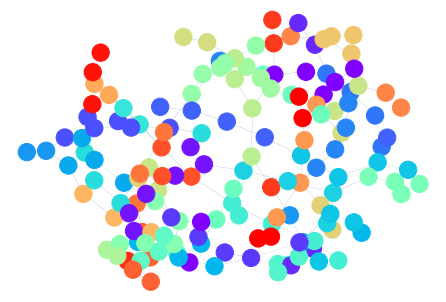

In [7]:
fsom.vis(t=4, # the number of total nodes = t * bestk
       edge_color='b', 
       node_size=300, 
       with_labels=False)
# plt.savefig('mst.png')
fsom.labeling()

In [8]:
output_df = fsom.df # new column added: category
output_tf_df = fsom.tf_df # new column added: category
output_df

B530-H    B530-A    B675-H    B572-H     Width  category
0    -0.474091 -0.404480  1.334022  0.999182 -0.197554        22
1     1.728859  1.713399  0.017838  1.021829  1.561027        23
2     0.976026  0.977343 -0.765197  0.204690  1.045261        37
3     0.535290  0.602418  1.282709  1.122708  0.867374        37
4    -0.440517 -0.434348  1.277750  0.737162 -0.354678        22
...        ...       ...       ...       ...       ...       ...
1354  0.558394  0.584444  0.237374  0.413534  0.680649        17
1355 -0.396269 -0.370310 -0.497426 -0.609541 -0.197554        14
1356 -0.279430 -0.834487 -0.635217 -0.716704 -1.170665        30
1357 -0.109532 -0.055401  0.104756 -0.077991  0.178679        18
1358 -0.187516 -0.157566  0.855511  0.376368  0.036805        22

[1359 rows x 6 columns]

In [9]:
run_eval(output_df,y,output_df['category'])

Rand Index: 0.530
Adjusted Rand Index: 0.081
Homogeneity: 0.369
Completeness: 0.107
V-measure: 0.166
Adjusted Mutual Information: 0.161


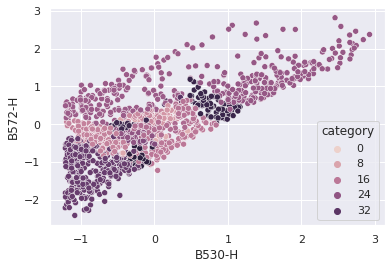

In [10]:

pl = sns.scatterplot(data=output_df, x="B530-H", y="B572-H", hue=output_df['category'])

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
Rand Index: 0.552
Adjusted Rand Index: 0.109
Homogeneity: 0.320
Completeness: 0.123
V-measure: 0.178
Adjusted Mutual Information: 0.177
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
Rand Index: 0.556
Adjusted Rand Index: 0.173
Homogeneity: 0.638
Completeness: 0.188
V-measure: 0.291
Adjusted Mutual Information: 0.290
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
Rand Index: 0.523
Adjusted Rand Index: 0.065
Homogeneity: 0.261
Completeness: 0.092
V-measure: 0.136
Adjusted Mutual Information: 0.135
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
Rand Index: 0.581
Adjusted Rand Index: 0.216
Homogeneity: 0.636
Completeness: 0.218
V-meas

/home/mika/.local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


../labeled_dataset/GL58_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_3A.csv
(7971, 5)
Rand Index: 0.514
Adjusted Rand Index: 0.113
Homogeneity: 0.471
Completeness: 0.147
V-measure: 0.224
Adjusted Mutual Information: 0.224
../labeled_dataset/GL58_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_1A.csv
(10296, 5)
Rand Index: 0.513
Adjusted Rand Index: 0.050
Homogeneity: 0.225
Completeness: 0.081
V-measure: 0.119
Adjusted Mutual Information: 0.119
../labeled_dataset/GL59_DN_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_1A.csv
(11994, 5)
Rand Index: 0.560
Adjusted Rand Index: 0.162
Homogeneity: 0.605
Completeness: 0.190
V-measure: 0.289
Adjusted Mutual Information: 0.289
../labeled_dataset/GL58_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_2A.csv
(6844, 5)
Rand Index: 0.549
Adjusted Rand Index: 0.154
Homogeneity: 0.625
Completeness: 0.188
V-meas

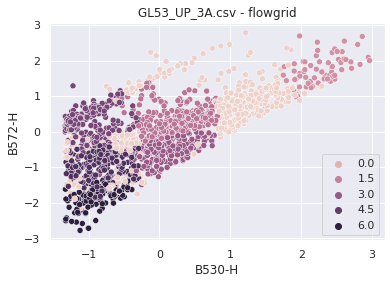

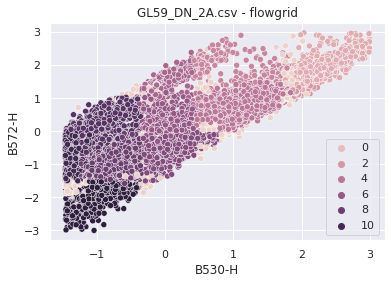

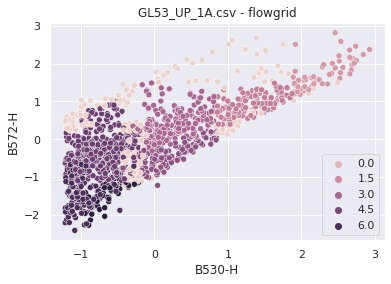

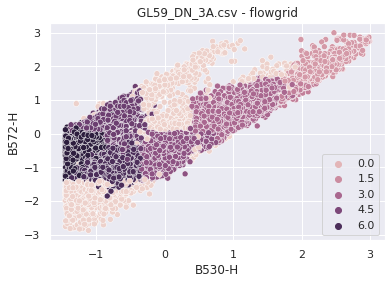

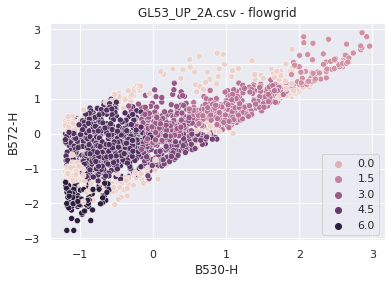

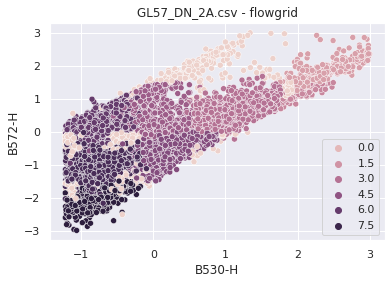

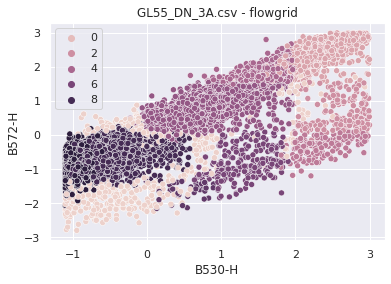

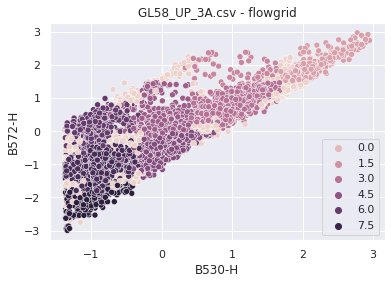

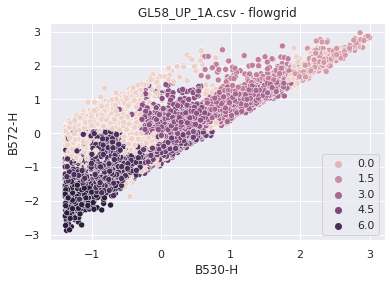

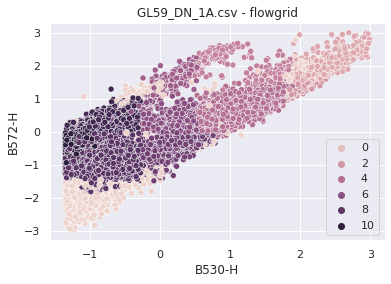

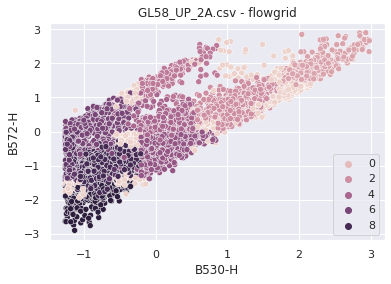

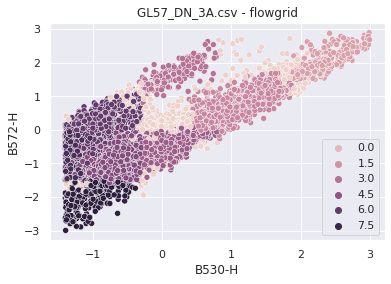

In [17]:
run_all(columns,clustering="flowgrid")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
../labeled_dataset/GL53_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_2A.csv
../labeled_dataset/GL57_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL57_DN_2A.csv
../labeled_dataset/GL55_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL55_DN_3A.csv
../labeled_dataset/GL58_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_3A.csv
../labeled_dataset/GL58_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks

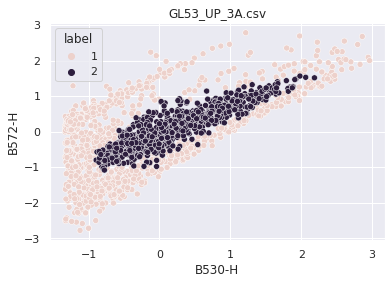

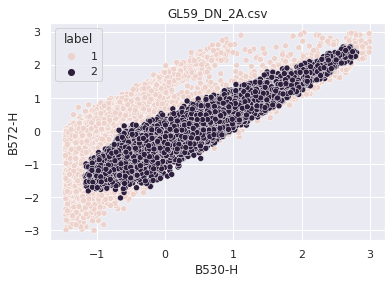

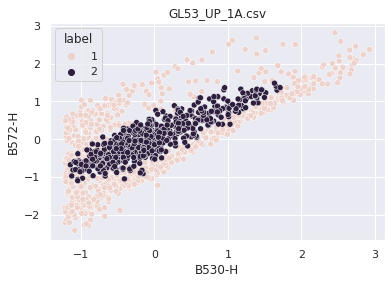

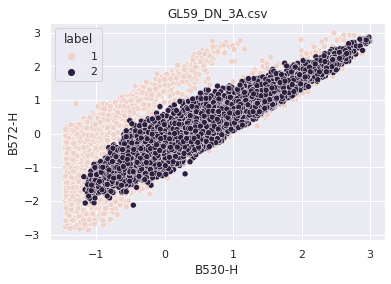

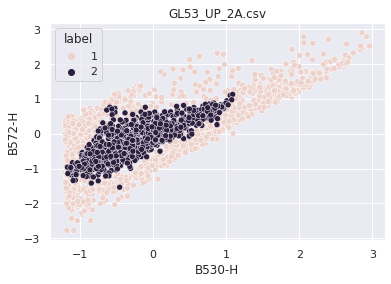

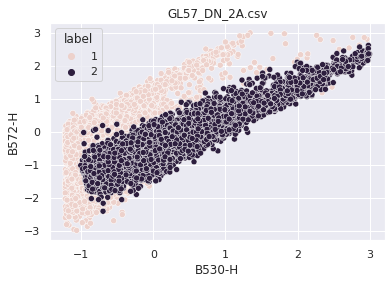

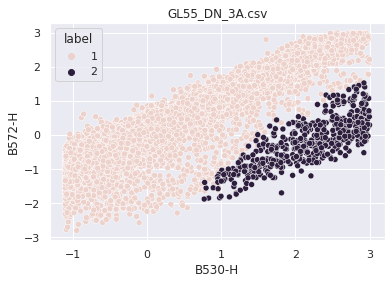

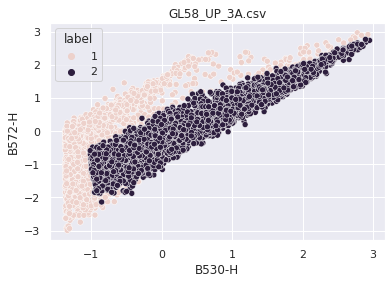

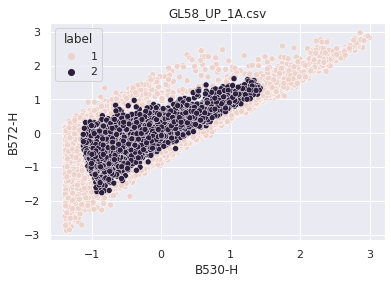

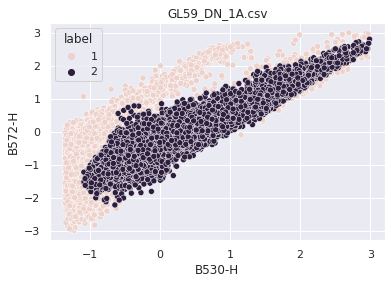

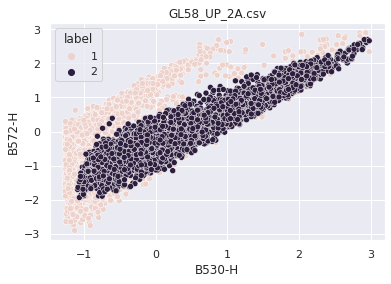

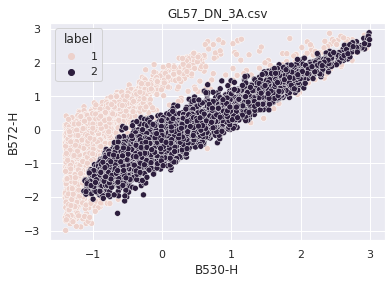

In [12]:
save_all_true(columns)

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
Rand Index: 0.544
Adjusted Rand Index: 0.089
Homogeneity: 0.061
Completeness: 0.062
V-measure: 0.062
Adjusted Mutual Information: 0.061
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
Rand Index: 0.542
Adjusted Rand Index: 0.083
Homogeneity: 0.092
Completeness: 0.086
V-measure: 0.089
Adjusted Mutual Information: 0.089
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
Rand Index: 0.505
Adjusted Rand Index: 0.007
Homogeneity: 0.002
Completeness: 0.002
V-measure: 0.002
Adjusted Mutual Information: 0.001
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
Rand Index: 0.570
Adjusted Rand Index: 0.140
Homogeneity: 0.154
Completeness: 0.143
V-meas

/home/mika/.local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


../labeled_dataset/GL58_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_3A.csv
(7971, 5)
Rand Index: 0.567
Adjusted Rand Index: 0.132
Homogeneity: 0.165
Completeness: 0.150
V-measure: 0.157
Adjusted Mutual Information: 0.157
../labeled_dataset/GL58_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_1A.csv
(10296, 5)
Rand Index: 0.500
Adjusted Rand Index: -0.000
Homogeneity: 0.002
Completeness: 0.002
V-measure: 0.002
Adjusted Mutual Information: 0.002
../labeled_dataset/GL59_DN_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_1A.csv
(11994, 5)
Rand Index: 0.543
Adjusted Rand Index: 0.084
Homogeneity: 0.104
Completeness: 0.101
V-measure: 0.102
Adjusted Mutual Information: 0.102
../labeled_dataset/GL58_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_2A.csv
(6844, 5)
Rand Index: 0.536
Adjusted Rand Index: 0.068
Homogeneity: 0.105
Completeness: 0.102
V-mea

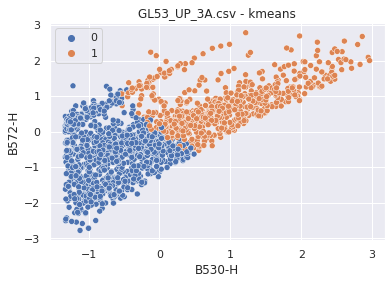

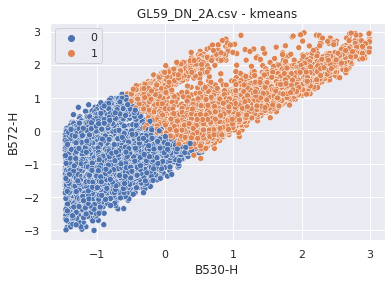

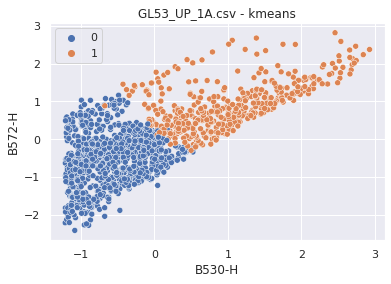

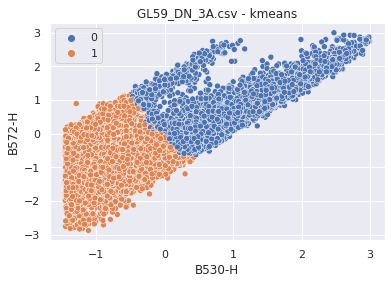

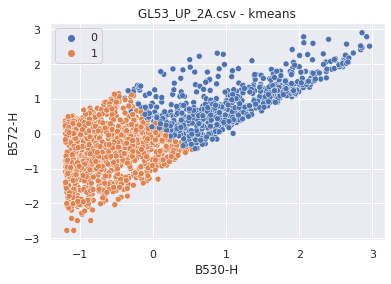

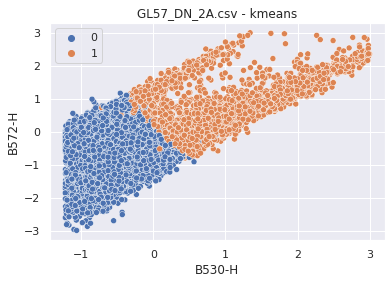

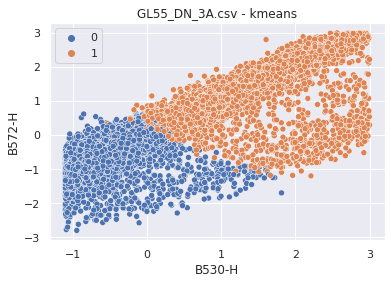

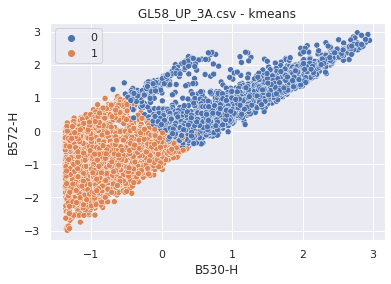

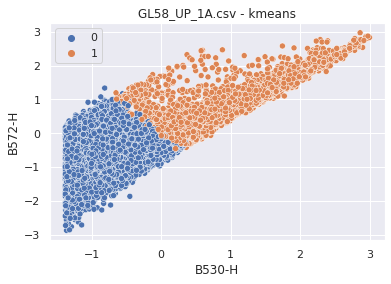

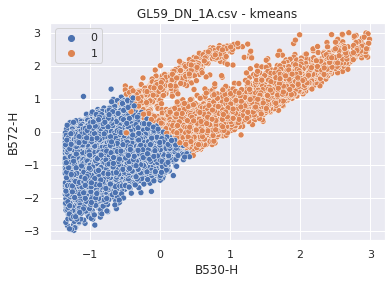

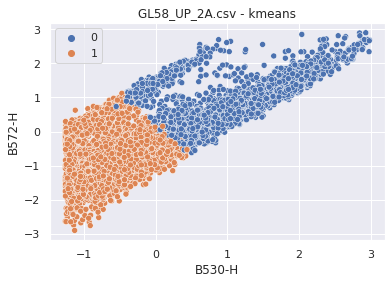

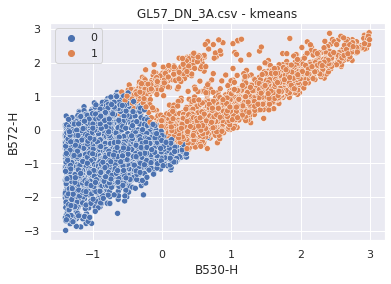

In [13]:
run_all(columns,clustering="kmeans")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
Rand Index: 0.500
Adjusted Rand Index: -0.001
Homogeneity: 0.229
Completeness: 0.095
V-measure: 0.134
Adjusted Mutual Information: 0.119
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
Rand Index: 0.517
Adjusted Rand Index: -0.000
Homogeneity: 0.171
Completeness: 0.074
V-measure: 0.103
Adjusted Mutual Information: 0.091
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
Rand Index: 0.501
Adjusted Rand Index: 0.009
Homogeneity: 0.349
Completeness: 0.105
V-measure: 0.162
Adjusted Mutual Information: 0.147
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
Rand Index: 0.503
Adjusted Rand Index: -0.022
Homogeneity: 0.189
Completeness: 0.071
V-m

/home/mika/.local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


../labeled_dataset/GL58_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_3A.csv
(7971, 5)
Rand Index: 0.514
Adjusted Rand Index: 0.003
Homogeneity: 0.216
Completeness: 0.075
V-measure: 0.112
Adjusted Mutual Information: 0.099
../labeled_dataset/GL58_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_1A.csv
(10296, 5)
Rand Index: 0.504
Adjusted Rand Index: -0.002
Homogeneity: 0.202
Completeness: 0.079
V-measure: 0.113
Adjusted Mutual Information: 0.102
../labeled_dataset/GL59_DN_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_1A.csv
(11994, 5)
Rand Index: 0.507
Adjusted Rand Index: -0.011
Homogeneity: 0.164
Completeness: 0.075
V-measure: 0.103
Adjusted Mutual Information: 0.092
../labeled_dataset/GL58_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_2A.csv
(6844, 5)
Rand Index: 0.498
Adjusted Rand Index: -0.026
Homogeneity: 0.192
Completeness: 0.077
V-m

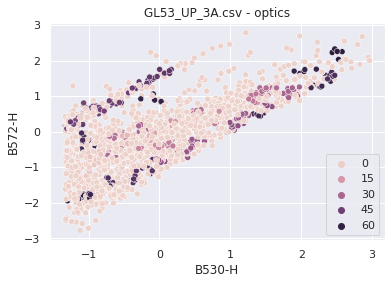

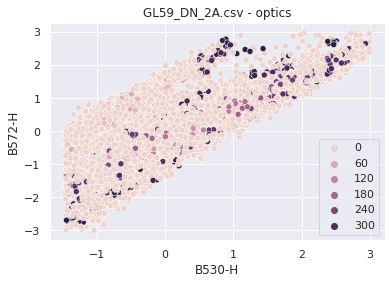

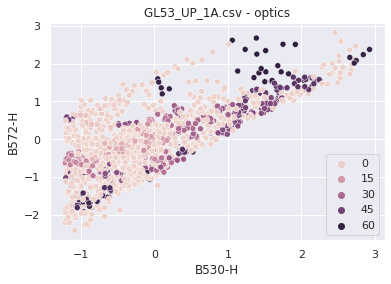

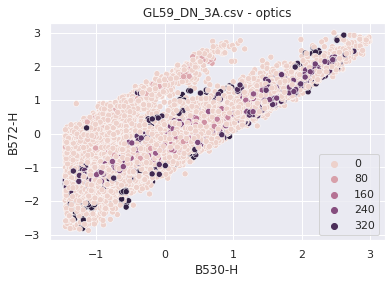

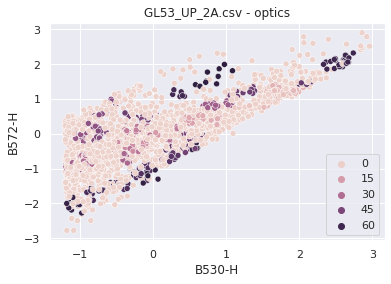

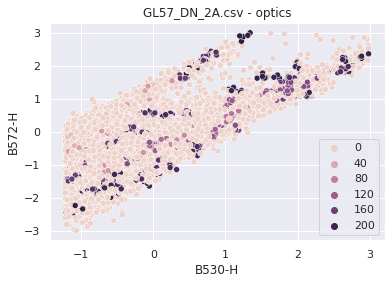

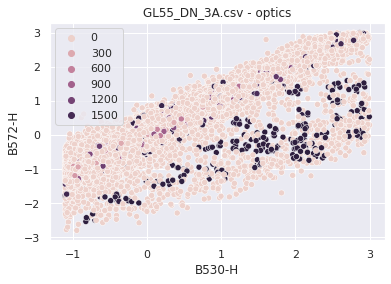

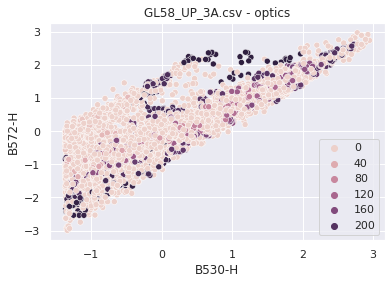

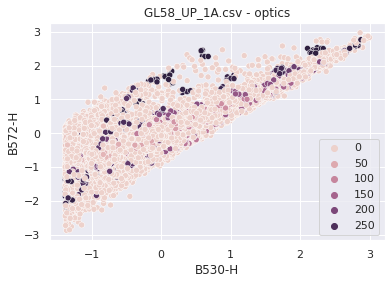

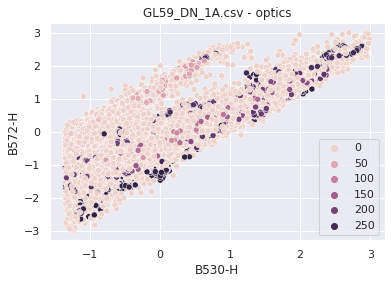

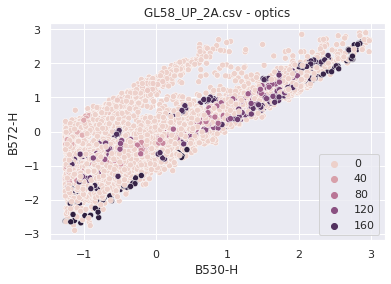

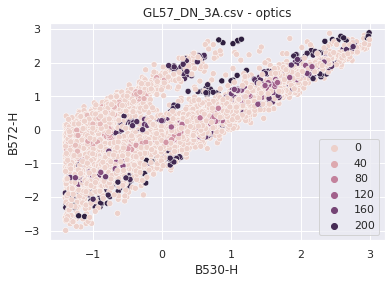

In [14]:
run_all(columns,clustering="optics")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
Rand Index: 0.605
Adjusted Rand Index: 0.210
Homogeneity: 0.160
Completeness: 0.159
V-measure: 0.160
Adjusted Mutual Information: 0.159
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
Rand Index: 0.723
Adjusted Rand Index: 0.444
Homogeneity: 0.384
Completeness: 0.359
V-measure: 0.371
Adjusted Mutual Information: 0.371
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
Rand Index: 0.506
Adjusted Rand Index: 0.012
Homogeneity: 0.007
Completeness: 0.007
V-measure: 0.007
Adjusted Mutual Information: 0.006
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
Rand Index: 0.739
Adjusted Rand Index: 0.478
Homogeneity: 0.442
Completeness: 0.410
V-meas

/home/mika/.local/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


../labeled_dataset/GL58_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_3A.csv
(7971, 5)
Rand Index: 0.704
Adjusted Rand Index: 0.407
Homogeneity: 0.412
Completeness: 0.372
V-measure: 0.391
Adjusted Mutual Information: 0.391
../labeled_dataset/GL58_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_1A.csv
(10296, 5)
Rand Index: 0.500
Adjusted Rand Index: -0.000
Homogeneity: 0.001
Completeness: 0.001
V-measure: 0.001
Adjusted Mutual Information: 0.001
../labeled_dataset/GL59_DN_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_1A.csv
(11994, 5)
Rand Index: 0.722
Adjusted Rand Index: 0.443
Homogeneity: 0.432
Completeness: 0.410
V-measure: 0.420
Adjusted Mutual Information: 0.420
../labeled_dataset/GL58_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_2A.csv
(6844, 5)
Rand Index: 0.644
Adjusted Rand Index: 0.287
Homogeneity: 0.317
Completeness: 0.298
V-mea

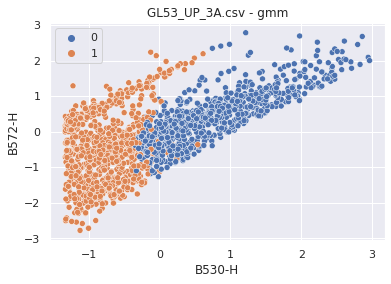

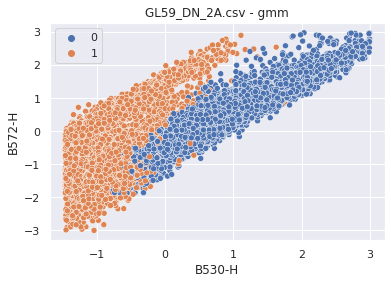

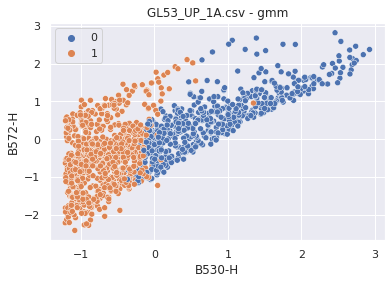

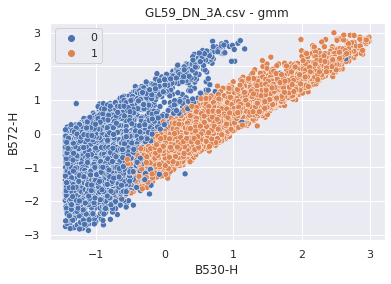

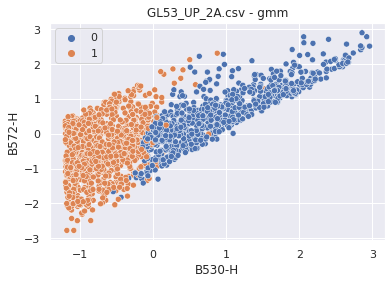

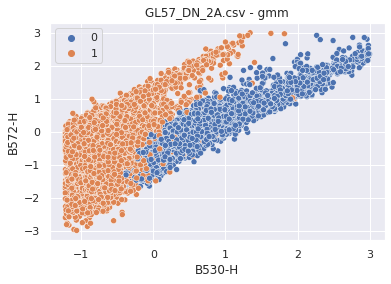

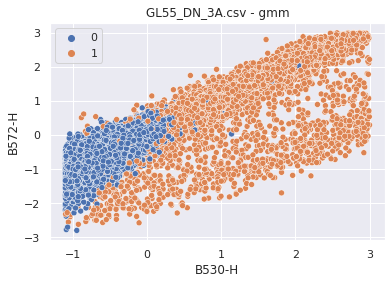

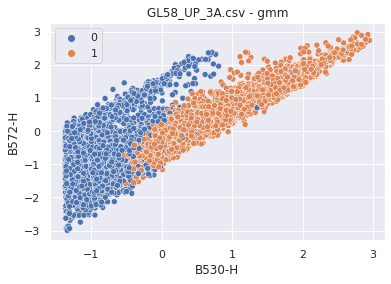

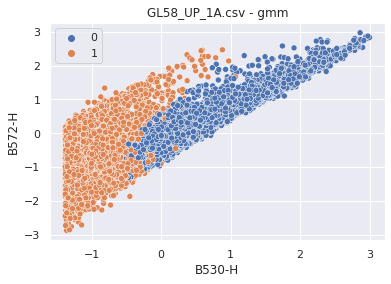

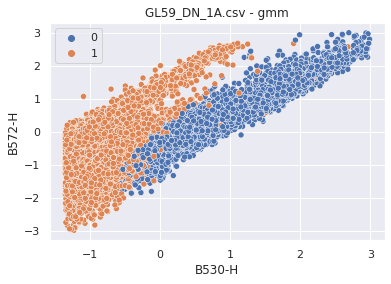

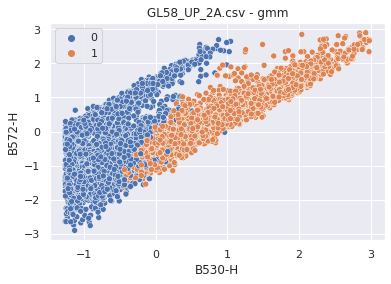

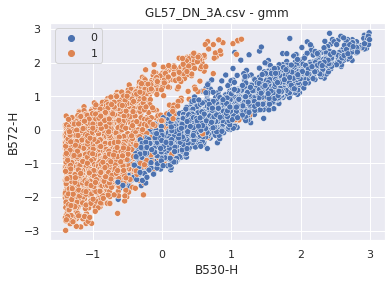

In [15]:
run_all(columns,clustering="gmm")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
Rand Index: 0.822
Adjusted Rand Index: 0.643
Homogeneity: 0.532
Completeness: 0.534
V-measure: 0.533
Adjusted Mutual Information: 0.533
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
Rand Index: 0.564
Adjusted Rand Index: 0.041
Homogeneity: 0.031
Completeness: 0.181
V-measure: 0.053
Adjusted Mutual Information: 0.053
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
Rand Index: 0.515
Adjusted Rand Index: 0.000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Mutual Information: -0.000
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
Rand Index: 0.565
Adjusted Rand Index: 0.038
Homogeneity: 0.025
Completeness: 0.148
V-mea

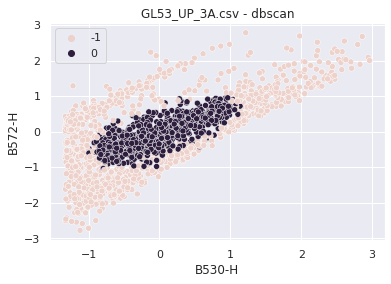

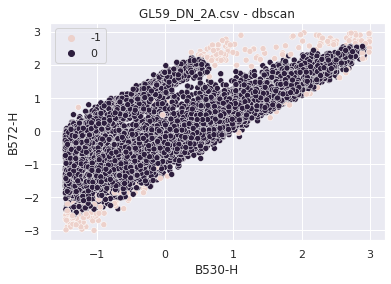

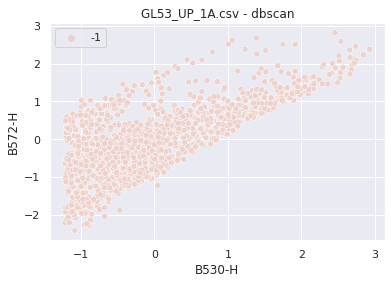

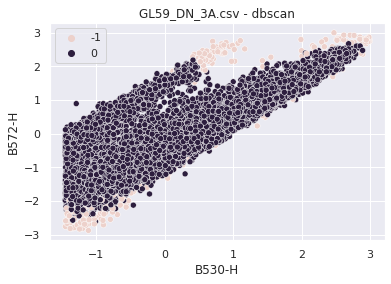

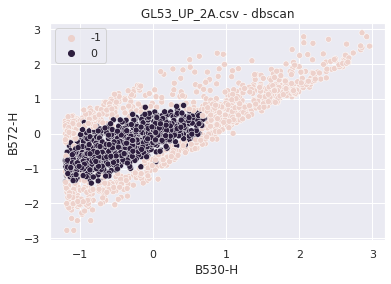

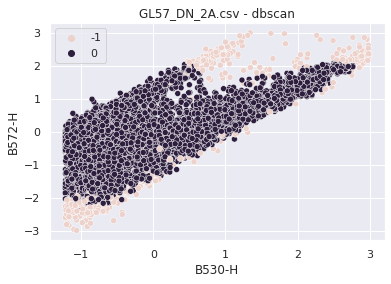

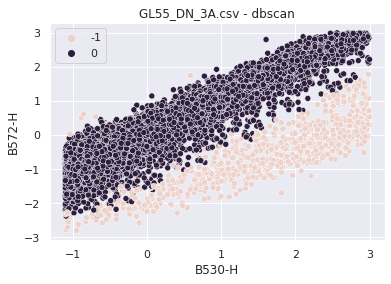

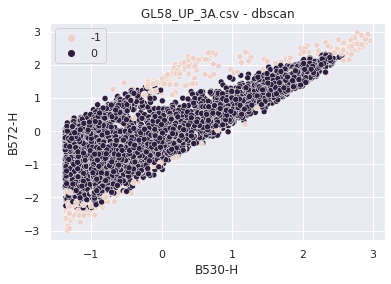

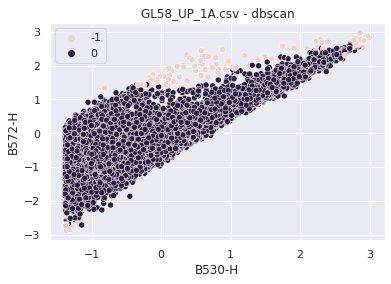

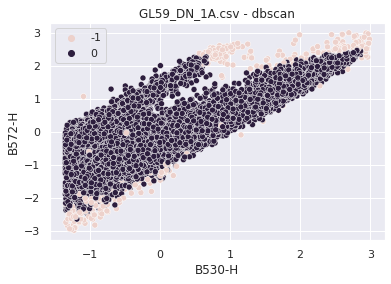

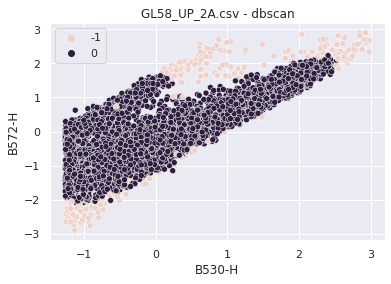

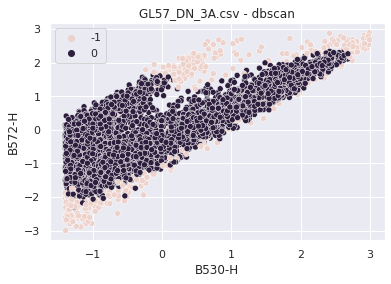

In [16]:
run_all(columns,clustering="dbscan")

### DBSCAN

In [ ]:
labels = clusterDBSCAN(X)

In [ ]:
y_pred = labels
y_true = y.to_list()

run_eval(X,y_true,y_pred)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
labels_true = y.to_list()
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("F1-score: %0.3f"
      % f1_score(labels_true, labels, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

## K means

In [ ]:
#run_all_Kmeans(columns)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
labels_true = y.to_list()
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("F1-score: %0.3f"
      % f1_score(labels_true, labels, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

### GMM


In [ ]:
labels = clusterGMM(X)

y_pred = labels
y_true = y.to_list()


print("F1-score: %0.3f"
      % f1_score(y_true, y_pred, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(y_true, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_true, y_pred))


### OPTICS


In [ ]:
labels = clusterOPTICS(X)

y_pred = labels
y_true = y.to_list()


print("F1-score: %0.3f"
      % f1_score(y_true, y_pred, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(y_true, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_true, y_pred))


## FlowGrid

In [ ]:
run_FlowGrid(nbins=2,eps=1.2,isEvaluation=True)

In [ ]:
output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

In [ ]:
print(output_labels.shape)
print(X.shape)
print(y.shape)

In [ ]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

In [ ]:
X = X.drop([0])
y = y.drop([0])

In [ ]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

## Evaluation

In [ ]:
y_true = y.to_list()
y_pred = output_labels.tolist()

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print("True label"+str(dict(zip(unique, counts))))
unique, counts = np.unique(output_labels, return_counts=True)
print("FlowGrid label"+str(dict(zip(unique, counts))))

### F1 score

Provide a value between 0 and 1 for each cluster, with 1 indicating a perfect reproduction of the corresponding manually gated population. Since we want to match clusters to reference population (manually gated clusters), we have to change a bit the methodology and use an algorithm called the “Hungarian assignment algorithm” which solves the assignment problem by finding a one-to-one mapping that maximizes the sum of F1-scores across reference population.


Hungarian assigment would come during the mapping (clustering algorithm) and is not yet implemented

In [ ]:
f1_score(y_true, y_pred, average='micro') #micro because class imbalance https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

### RI

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.


Perfectly matching labelings have a score of 1 even.
Labelings that assign all classes members to the same clusters are complete but may not always be pure, hence penalized:

In [ ]:
rand_score(y_true, y_pred)

### ARI

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

(Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.)

In [ ]:
adjusted_rand_score(y_true,y_pred)

### Crossvalidation with DBSCAN

In [ ]:
from sklearn.metrics import homogeneity_score, make_scorer

def score_func(y_true, y_pred, **kwargs):
    return homogeneity_score(y_true, y_pred)
scorer = make_scorer(score_func)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


model = DBSCAN(n_jobs=-1)

param_grid = {"min_samples":np.arange(10),
             "eps":[1.1,1.2]}

grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scorer, cv=3)


In [ ]:
#grid_result = grid.fit(X_train, y_train)


## Let's try another file

In [ ]:
file = '../labeled_dataset/GL59_DN_2A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B675-H','Width']
X,y = preprocess(file,columns)